In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r"/Users/asmaabou/Desktop/Github/Dépression/Student Depression Dataset.csv")

# Remove duplicate rows
df = df.drop_duplicates()

# Drop the unnecessary 'id' column
df = df.drop(columns=['id'])

# Display the first few rows to check
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
# Check for missing values
print(df.isna().sum())

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [4]:
# Replace NaN in 'Financial Stress' with the median
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())

# Clean string columns (remove spaces and convert to lowercase)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

In [5]:
print(df.isna().sum())

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [6]:
# Encode binary categorical variables
# Encode Gender (male = 1, female = 0)
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

# Encode Suicidal thoughts (yes = 1, no = 0)
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'yes': 1, 'no': 0})

# Encode Family history of mental illness (yes = 1, no = 0)
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'yes': 1, 'no': 0})

# Simplify Sleep Duration categories
df['Sleep Duration'] = df['Sleep Duration'].replace({
    'less than 5 hours': '<5h',
    '5-6 hours': '5-6h',
    '7-8 hours': '7-8h',
    'more than 8 hours': '>8h'
})

# Simplify Degree levels
degree_map = {
    'high school': 'high school',
    'b.tech': 'bachelor', 'bsc': 'bachelor', 'bca': 'bachelor', 'ba': 'bachelor', 'b.pharm': 'bachelor',
    'm.tech': 'master', 'msc': 'master', 'mba': 'master',
    'phd': 'doctorate'
}
df['Degree'] = df['Degree'].map(degree_map).fillna('other')

# Simplify professions into major categories
profession_map = {
    'student': 'student',
    'teacher': 'education',
    'educational consultant': 'education',
    'doctor': 'healthcare',
    'pharmacist': 'healthcare',
    'content writer': 'creative',
    'ux/ui designer': 'creative',
    'digital marketer': 'creative',
    'chef': 'service',
    'lawyer': 'professional',
    'civil engineer': 'professional',
    'manager': 'management',
    'entrepreneur': 'management',
    'other': 'other'
}

# Apply the mapping
df['Profession'] = df['Profession'].map(profession_map).fillna('other')


In [7]:
# Classify cities as Urban or Rural
city_to_area = {
    # Major metropolitan cities → URBAN
    'delhi': 'urban', 'mumbai': 'urban', 'bangalore': 'urban', 'chennai': 'urban',
    'hyderabad': 'urban', 'pune': 'urban', 'kolkata': 'urban', 'ahmedabad': 'urban',
    'jaipur': 'urban', 'lucknow': 'urban', 'indore': 'urban', 'surat': 'urban',
    'bhopal': 'urban', 'vadodara': 'urban', 'visakhapatnam': 'urban', 'rajkot': 'urban',
    'kanpur': 'urban', 'faridabad': 'urban', 'ludhiana': 'urban', 'ghaziabad': 'urban',
    'varanasi': 'urban', 'nagpur': 'urban', 'patna': 'urban', 'bhubaneswar': 'urban',

    # Medium or small cities → RURAL (or semi-urban)
    'srinagar': 'rural', 'ranchi': 'rural', 'nashik': 'rural', 'vadodara': 'rural',
    'kalyan': 'rural', 'thane': 'rural', 'coimbatore': 'rural', 'rajahmundry': 'rural',
    'mysore': 'rural', 'trichy': 'rural', 'salem': 'rural', 'madurai': 'rural',
    'nanded': 'rural', 'aurangabad': 'rural', 'meerut': 'rural', 'agra': 'rural',
    'vadodara': 'rural', 'rajkot': 'rural', 'noida': 'rural', 'howrah': 'rural',

   }

# Apply the classification (City → Urban or Rural)
df['Area_Type'] = df['City'].map(city_to_area).fillna('rural')

# Remove the original City column (
df = df.drop(columns=['City'])

# Convert Area_Type (urban/rural) into numeric values
df['Area_Type'] = df['Area_Type'].map({'urban': 1, 'rural': 0})


In [8]:
df.head()

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Area_Type
0,1,33.0,student,5.0,0.0,8.97,2.0,0.0,5-6h,healthy,bachelor,1,3.0,1.0,0,1,1
1,0,24.0,student,2.0,0.0,5.90,5.0,0.0,5-6h,moderate,bachelor,0,3.0,2.0,1,0,1
2,1,31.0,student,3.0,0.0,7.03,5.0,0.0,<5h,healthy,bachelor,0,9.0,1.0,1,0,0
3,0,28.0,student,3.0,0.0,5.59,2.0,0.0,7-8h,moderate,bachelor,1,4.0,5.0,1,1,1
4,0,25.0,student,4.0,0.0,8.13,3.0,0.0,5-6h,moderate,master,1,1.0,1.0,0,0,1


In [9]:
# Create a global stress score
df['Stress_Score'] = df[['Academic Pressure', 'Work Pressure', 'Financial Stress']].mean(axis=1)

# Create a global satisfaction score
df['Satisfaction_Score'] = df[['Study Satisfaction', 'Job Satisfaction']].mean(axis=1)

# Drop the old redundant columns
df = df.drop(columns=[
    'Academic Pressure',
    'Work Pressure',
    'Financial Stress',
    'Study Satisfaction',
    'Job Satisfaction'
])

# Check the new scores
df[['Stress_Score', 'Satisfaction_Score']].head()

,Stress_Score,Satisfaction_Score
0,2.000000,1.0
1,1.333333,2.5
2,1.333333,2.5
3,2.666667,1.0
4,1.666667,1.5


In [10]:
# Encode categorical columns to include them in the correlation
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate correlation with Depression
corr = df_encoded.corr(numeric_only=True)
corr['Depression'].sort_values(ascending=False)

Depression                               1.000000
Stress_Score                             0.550853
Have you ever had suicidal thoughts ?    0.546277
Work/Study Hours                         0.208563
Dietary Habits_unhealthy                 0.189352
Sleep Duration_<5h                       0.078830
Family History of Mental Illness         0.053430
Degree_other                             0.040563
CGPA                                     0.022210
Area_Type                                0.014769
Sleep Duration_7-8h                      0.011551
Profession_healthcare                    0.010075
Profession_other                         0.009952
Profession_education                     0.008735
Profession_professional                  0.007124
Profession_management                    0.007124
Profession_service                       0.007124
Dietary Habits_others                    0.003418
Gender                                   0.001794
Sleep Duration_others                   -0.004410


/var/folders/qb/08t6z1cs407654x0tpx4jrz40000gn/T/ipykernel_27997/542007965.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_filtered.values, y=corr_filtered.index, palette='RdBu')


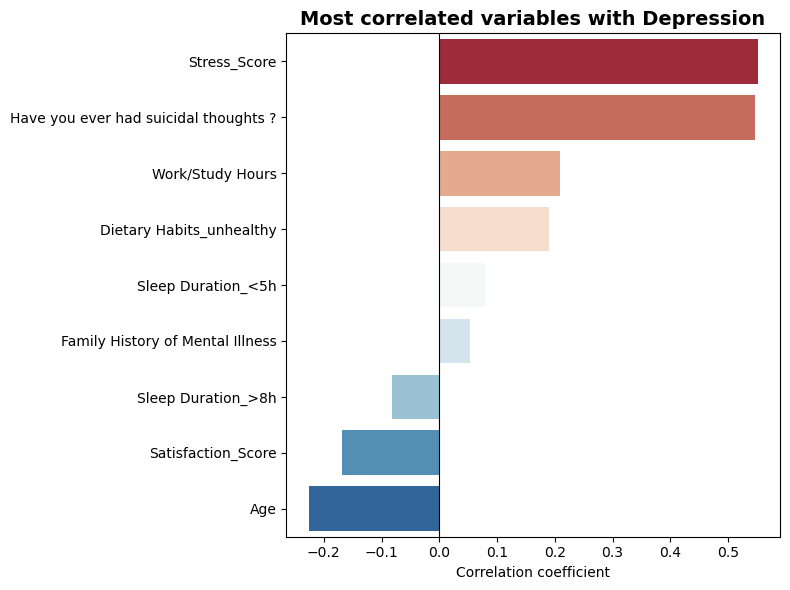

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Encode categorical columns to include them
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute correlations with Depression
corr = df_encoded.corr(numeric_only=True)['Depression'].drop('Depression').sort_values(ascending=False)

# Filter only relevant correlations (absolute value > 0.05)
corr_filtered = corr[abs(corr) > 0.05]

# Plot filtered correlations
plt.figure(figsize=(8,6))
sns.barplot(x=corr_filtered.values, y=corr_filtered.index, palette='RdBu')
plt.title("Most correlated variables with Depression", fontsize=14, weight='bold')
plt.xlabel("Correlation coefficient")
plt.ylabel("")
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


In [12]:
# Define features (X) and target (y)
X = df.drop(columns=['Depression'])
y = df['Depression']

# Convert categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8353341695036732

Confusion Matrix:
 [[1834  509]
 [ 410 2828]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.84      0.83      5581



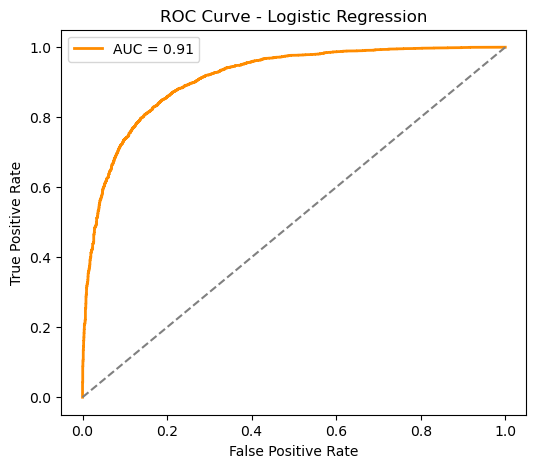

In [14]:
# Import functions to compute ROC curve and AUC (Area Under the Curve)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (1 = depression)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the Area Under the Curve (AUC) value
roc_auc = auc(fpr, tpr)

# Create a new figure with a specific size
plt.figure(figsize=(6, 5))

# Plot the ROC curve (TPR vs FPR)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')

# Add a dashed diagonal line representing random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve - Logistic Regression')

plt.legend()

plt.show()


In [17]:
import joblib
import json

# Save the trained model
joblib.dump(model, 'depression_model.joblib')
print("✅ Model saved as depression_model.joblib")

# Save the list of feature names (optional but useful)
X_cols = list(X.columns)   # all the columns used during training
with open('depression_model_columns.json', 'w') as f:
    json.dump(X_cols, f)
print("✅ Column names saved as depression_model_columns.json")


✅ Model saved as depression_model.joblib
✅ Column names saved as depression_model_columns.json
